In [ ]:
#hide
from criminologia_cdmx.etl import *
from criminologia_cdmx.patrones_espacio_temporales import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#hide
%matplotlib widget

# criminologia_cdmx

> Herramientas para el análisis espacial de la delincuencia en la CDMX.

## Instalación

`pip install criminologia_cdmx`

## Uso

## ETL
````Python
from criminologia_cdmx.etl import *
````

### Bajar datos abiertos

Podemos bajar dos fuentes de datos: [carpetas de investigación](https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico) y [víctimas en carpetas de investigación](https://datos.cdmx.gob.mx/dataset/victimas-en-carpetas-de-investigacion-fgj/resource/d543a7b1-f8cb-439f-8a5c-e56c5479eeb5).

Hay dos formas de bajar los datos abiertos, la primera es usando el api que baja las primeras `limit` carpetas/víctimas de la base abierta

In [ ]:
carpetas = get_carpetas_from_api(limit=100)
carpetas.head()

,_id,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,...,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,geometry
0,1,2016,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01T00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,...,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.1402149999999,19.3803149998337,NaN,POINT (-99.14021 19.38031)
1,2,2016,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01T00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.1084029999999,19.3528589998337,NaN,POINT (-99.10840 19.35286)
2,3,2016,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01T01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,...,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.3564509998336,NaN,POINT (-99.06132 19.35645)
3,4,2016,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01T02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,...,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.9763790000001,19.3316329998333,NaN,POINT (-98.97638 19.33163)
4,5,2015,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01T02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,...,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.1721889999999,19.387113999834,NaN,POINT (-99.17219 19.38711)


In [ ]:
victimas = get_victimas_from_api(limit=100)
victimas.head()

,_id,idCarpeta,Ano_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,...,FechaHecho,HoraHecho,HoraInicio,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud,geometry
0,1,8324429,2019,Enero,2019-04-01T00:00:00,FRAUDE,DELITO DE BAJO IMPACTO,Masculino,62,FISICA,...,2018-08-29,12:00:00,12:19:00,ALVARO OBREGON,GUADALUPE INN,INSUGENTES SUR,NaN,19.36125,-99.18314,POINT (-99.18314 19.36125)
1,2,8324430,2019,Enero,2019-04-01T00:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,Femenino,38,FISICA,...,2018-12-15,15:00:00,12:20:00,AZCAPOTZALCO,VICTORIA DE LAS DEMOCRACIAS,AV. CUATLAHUAC,NaN,19.47181,-99.16458,POINT (-99.16458 19.47181)
2,3,8324431,2019,Enero,2019-04-01T00:00:00,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42,FISICA,...,2018-12-22,15:30:00,12:23:00,COYOACAN,COPILCO UNIVERSIDAD ISSSTE,COPILCO,NaN,19.33797,-99.18611,POINT (-99.18611 19.33797)
3,4,8324435,2019,Enero,2019-04-01T00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,35,FISICA,...,2019-04-01,06:00:00,12:27:00,IZTACALCO,AGRÍCOLA PANTITLAN,CALLE 6,ENTRE PRIVADA DEL VALLE Y PRIVADA GONZALEZ,19.40327,-99.05983,POINT (-99.05983 19.40327)
4,5,8324438,2019,Enero,2019-04-01T00:00:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,...,2019-03-01,20:00:00,12:35:00,IZTAPALAPA,PROGRESISTA,UNIVERSIDAD,NaN,19.3548,-99.06324,POINT (-99.06324 19.35480)


La segunda es bajar el histórico completo:

````Python
carpetas_todas = get_historico_carpetas()
victimas_todas = get_historico_victimas()
````

También es posible procesar los datos a partir de un archivo guardado en la computadora, ya sea obtenido de la página de datos abiertos o guardado con las funciones `get_historico_carpetas`/`get_historico_victimas`.

````Python
carpetas = get_carpetas_desde_archivo("path-a-los-datos")
victimas_todas = get_victimas_desde_archivo("path-a-los-datos")
````

### Agregar identificadores espaciales (carpetas o victimas)

Para agregar los identificadores de colonia y cuadrante:

In [ ]:
carpetas = agrega_ids_espaciales(carpetas)
carpetas.head()

,_id,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,...,alcaldia_hechos,competencia,longitud,latitud,tempo,geometry,colonia_cve,colonia_nombre,municipio_cvegeo,cuadrante_id
0,1,2016,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01T00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,...,BENITO JUAREZ,NaN,-99.1402149999999,19.3803149998337,NaN,POINT (-99.14021 19.38031),948,AMERICAS UNIDAS-DEL LAGO,09014,016
1,2,2016,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01T00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,...,IZTAPALAPA,NaN,-99.1084029999999,19.3528589998337,NaN,POINT (-99.10840 19.35286),1303,LOS CIPRESES,09007,0111
2,3,2016,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01T01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,...,IZTAPALAPA,NaN,-99.061321,19.3564509998336,NaN,POINT (-99.06132 19.35645),1373,VICENTE GUERRERO-SUPER MANZANA 7 (U HAB),09007,0116
83,83,2016,Febrero,2016-02-01 15:30:00,2016,Febrero,2016-02-01T17:48:29,ROBO A NEGOCIO SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,...,IZTAPALAPA,NaN,-99.067653,19.3531039998337,NaN,POINT (-99.06765 19.35310),1364,PROGRESISTA,09007,0116
3,4,2016,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01T02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,...,IZTAPALAPA,NaN,-98.9763790000001,19.3316329998333,NaN,POINT (-98.97638 19.33163),1806,CAMPESTRE POTRERO,09007,0116


In [ ]:
victimas = agrega_ids_espaciales(victimas)
victimas.head()

,_id,idCarpeta,Ano_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,...,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud,geometry,colonia_cve,colonia_nombre,municipio_cvegeo,cuadrante_id
0,1,8324429,2019,Enero,2019-04-01T00:00:00,FRAUDE,DELITO DE BAJO IMPACTO,Masculino,62,FISICA,...,GUADALUPE INN,INSUGENTES SUR,NaN,19.36125,-99.18314,POINT (-99.18314 19.36125),263,GUADALUPE INN,09010,012
1,2,8324430,2019,Enero,2019-04-01T00:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,Femenino,38,FISICA,...,VICTORIA DE LAS DEMOCRACIAS,AV. CUATLAHUAC,NaN,19.47181,-99.16458,POINT (-99.16458 19.47181),683,VICTORIA DE LAS DEMOCRACIAS,09002,026
2,3,8324431,2019,Enero,2019-04-01T00:00:00,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42,FISICA,...,COPILCO UNIVERSIDAD ISSSTE,COPILCO,NaN,19.33797,-99.18611,POINT (-99.18611 19.33797),328,COPILCO EL BAJO,09003,0213
3,4,8324435,2019,Enero,2019-04-01T00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,35,FISICA,...,AGRÍCOLA PANTITLAN,CALLE 6,ENTRE PRIVADA DEL VALLE Y PRIVADA GONZALEZ,19.40327,-99.05983,POINT (-99.05983 19.40327),227,PANTITLAN V,09006,026
4,5,8324438,2019,Enero,2019-04-01T00:00:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,...,PROGRESISTA,UNIVERSIDAD,NaN,19.3548,-99.06324,POINT (-99.06324 19.35480),1366,LAS AMERICAS (U HAB),09007,0116


### Agregar categorías de usuario

Para clasificar las carpetas de investigación de acuerdo a una categorización definida por el usuario necesitamos un archivo que relacione la columna delitos de la base de carpetas con las categorías definidas por el usuario

In [ ]:
categorias = pd.read_csv("datos/categorias_carpetas.csv")
categorias

,incidente,categoria
0,HOMICIDIO POR AHORCAMIENTO,Homicidios dolosos
1,HOMICIDIO POR ARMA BLANCA,Homicidios dolosos
2,HOMICIDIO POR ARMA DE FUEGO,Homicidios dolosos
3,HOMICIDIO POR GOLPES,Homicidios dolosos
4,HOMICIDIOS INTENCIONALES (OTROS),Homicidios dolosos
...,...,...
73,ROBO DE VEHICULO DE SERVICIO PÚBLICO CON VIOLE...,Robo de/en vehículo
74,ROBO DE VEHICULO DE SERVICIO PÚBLICO SIN VIOLE...,Robo de/en vehículo
75,ROBO DE VEHICULO ELECTRICO MOTOPATIN,Robo de/en vehículo
76,"OBO DE VEHICULO EN PENSION, TALLER Y AGENCIAS C/V",Robo de/en vehículo


Entonces podemos agregar las categorías a nuestra base

In [ ]:
carpetas = agregar_categorias_carpetas(carpetas)
carpetas[['delito', 'categoria']]

,delito,categoria
0,DAÑO EN PROPIEDAD AJENA INTENCIONAL,NaN
1,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,Robo de/en vehículo
2,NARCOMENUDEO POSESION SIMPLE,NaN
3,ROBO A NEGOCIO SIN VIOLENCIA,Robo a negocio
4,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,Robo a transeúnte
...,...,...
90,USO DE DOCUMENTO FALSO,NaN
91,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,Robo a transeúnte
92,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,Robo a transeúnte
93,FRAUDE,NaN


Algo similar se puede hacer para los datos de Víctimas, en este caso el archivo de categorías es un poco diferente

In [ ]:
categorias_victimas = pd.read_csv("datos/categorias_victimas.csv")
categorias_victimas

,Delito,Categoria,Cantidad,Nivel 1,Nivel 2,Nivel 3
0,ABORTO,DELITO DE BAJO IMPACTO,168,NaN,NaN,NaN
1,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,DELITO DE BAJO IMPACTO,5924,NaN,NaN,NaN
2,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,12050,Abuso de Confianza,NaN,NaN
3,ABUSO SEXUAL,DELITO DE BAJO IMPACTO,10238,Abuso Sexual,NaN,NaN
4,ACOSO SEXUAL,DELITO DE BAJO IMPACTO,2986,NaN,NaN,NaN
...,...,...,...,...,...,...
295,VIOLACION TUMULTUARIA,VIOLACIÓN,74,NaN,NaN,NaN
296,VIOLACION TUMULTUARIA EQUIPARADA,VIOLACIÓN,4,NaN,NaN,NaN
297,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,VIOLACIÓN,2,NaN,NaN,NaN
298,VIOLACION Y ROBO DE VEHICULO,VIOLACIÓN,1,NaN,NaN,NaN


Las columnas importantes son `Nivel 1` y `Nivel 2` (podría haber más niveles), esas definen las categorías que se van a asignar a cada fila que se una a los datos de víctimas via la columna `Delito`

In [ ]:
victimas = agregar_categorias_victimas(victimas)
victimas[['Delito', 'Nivel 1', 'Nivel 2', 'Nivel 3']]

,Delito,Nivel 1,Nivel 2,Nivel 3
0,FRAUDE,Fraude,NaN,NaN
1,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",NaN,NaN,NaN
2,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,NaN,NaN,NaN
3,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,Robo de Vehículo de Servicio Particular,Sin Violencia,NaN
4,ROBO DE MOTOCICLETA SIN VIOLENCIA,NaN,NaN,NaN
...,...,...,...,...
90,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,Robo de Vehículo de Servicio Particular,Con Violencia,NaN
91,ABUSO DE CONFIANZA,Abuso de Confianza,NaN,NaN
92,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,Robo de Vehículo de Servicio Particular,Sin Violencia,NaN
93,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,Robo a Transeúnte en Vía Pública,Con Violencia,NaN


### Exportar datos para el visualizador

In [ ]:
exporta_datos_visualizador(carpetas, "datos/salidas/carpetas.csv", tipo='carpetas')
exporta_datos_visualizador(victimas, "datos/salidas/victimas.csv", tipo='victimas')

## Serie de tiempo por categoría

````Python
serie = serie_de_tiempo_categoria(carpetas_todas, pd.to_datetime('01/01/2016'), 'Robo a pasajero')
````

## Patrones espacio temporales

Este módulo tiene diferentes herramientas para explorar los patrones espacio-temporales de la actividad delictiva
````Python
from criminologia_cdmx.patrones_espacio_temporales import *
````

### Estimación de densidad de kernel
A partir de cualquier capa de incidentes se puede estimar el KDE utilizando validación cruzada para encontrar el mejor bandwidth

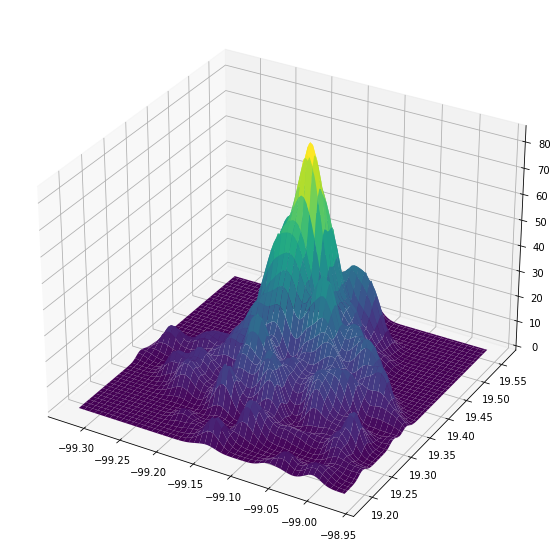

In [ ]:
carpetas = get_carpetas_from_api(1000)
x = carpetas.geometry.x.to_numpy()
y = carpetas.geometry.y.to_numpy()
params = {'bandwidth': np.linspace(0.001, 0.1, 100)}
bw = ajusta_bandwidth_kde(x, y, params)
xx, yy, zz = kde2D(x, y, bw, xbins=100j, ybins=100j)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz,cmap='viridis', edgecolor='none')

### Serie de tiempo de KDEs por categoría

Para una categoría determinada se obtiene la serie de tiempo de densidades de Kernel para un periodo arbitrario, utilizando la agregación temporal determinada por el usuario.

Para usar esta función no es necesario agregar los ids de unidades espaciales

In [ ]:
carpetas = get_historico_carpetas()
carpetas = agregar_categorias_de_usuario(carpetas)
fechas = pd.date_range(start='1/1/2017', end='1/1/2020', freq='M').to_list()
xx, yy, kdes = serie_tiempo_kde_categoria(carpetas, fechas, ["Homicidios dolosos"], "30 days")

/tmp/ipykernel_25308/253724238.py:1: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  carpetas = get_historico_carpetas()


A partir de esta serie de kdes es relatívamente fácil obtener una animación de la evolución:

/tmp/ipykernel_25308/3416935710.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


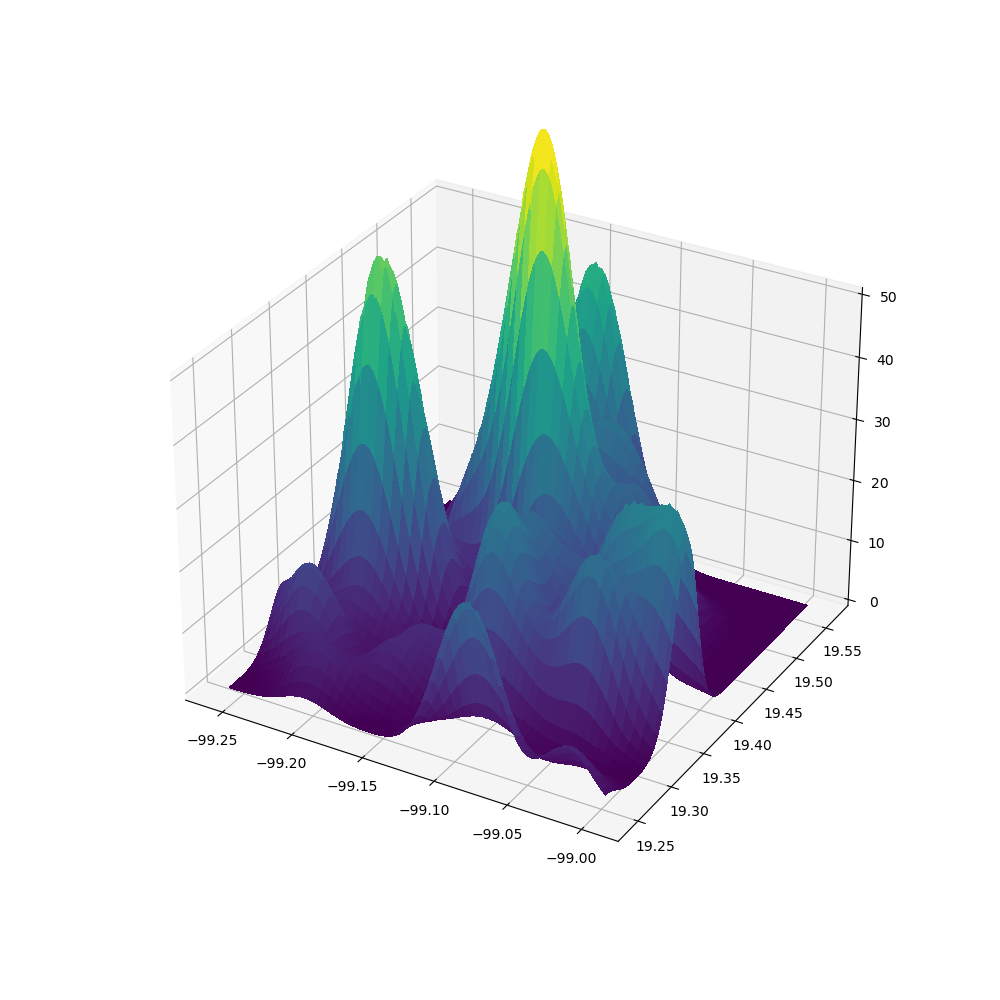

In [ ]:
import matplotlib.animation as animation
def data(t):
    d = kdes[t]
    ax.clear()
    surf = ax.plot_surface(XX, YY, d[2], cmap='viridis', edgecolor='none', antialiased=False)
    ax.set_zlim([0,50]) # set zlim to be always the same for every frame


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, kdes[0][2],cmap='viridis', edgecolor='none', antialiased=False)
ax.set_zlim(0, 50)
ani = animation.FuncAnimation(fig, data, len(kdes), interval=50, repeat=False )
plt.show()

In [ ]:
len(kdes)

36